In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn 

C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/adult.data", 
                   header=None, index_col=False, 
                   names = ['age', 'workclass', 'fnlwgt', 'education', 
                   'education-num', 'marital-status', 'occupation', 
                   'relationship', ' race', 'gender', 'capital-gane', 
                   'capital-loss', 'hours-per-week', 'native-country',
                   'income'])

In [3]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [4]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [6]:
print("Исходные признаки:\n", list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print("Признаки после get_gummies:\n", list(data_dummies.columns))

Исходные признаки:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_gummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("Форма массива X: {} Форма массива y: {}".format(X.shape, y.shape))

Форма массива X: (32561, 44) Форма массива y: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.81


C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
demo_df = pd.DataFrame({'Целочисленный признак': [0, 1, 2, 1], 
                        'Категориальный признак': ['socks', 'fox', 'socks', 'box']})
demo_df

,Целочисленный признак,Категориальный признак
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [12]:
pd.get_dummies(demo_df)

,Целочисленный признак,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [13]:
demo_df['Целочисленный признак'] = demo_df['Целочисленный признак'].astype(str)
pd.get_dummies(demo_df, columns=['Целочисленный признак', 'Категориальный признак'])

,Целочисленный признак_0,Целочисленный признак_1,Целочисленный признак_2,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


***

#### Биннинг, дискретизация, линейные модели и деревья

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [15]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

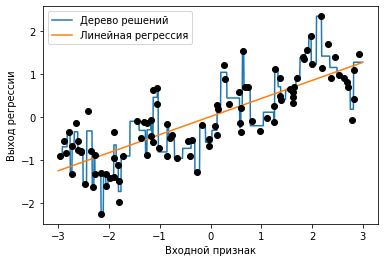

In [16]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='Дерево решений')
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='Линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc='best')

In [17]:
bins = np.linspace(-3, 3, 11)
print('Категории: {}'.format(bins))

Категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [18]:
which_bin = np.digitize(X, bins=bins)
print("\nТочки данных:\n", X[:5])
print("\nКатегории для точек данных:\n", which_bin[:5])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
print("Форма массива X_bined: {}".format(X_binned.shape))

Форма массива X_bined: (100, 10)


Text(0.5, 0, 'Входной признак')

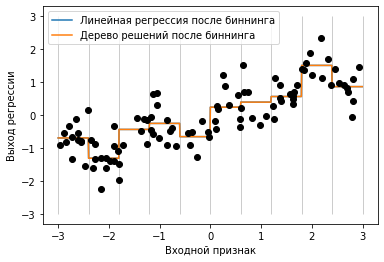

In [22]:
line_binned= encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Линейная регрессия после биннинга")
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Дерево решений после биннинга")
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")

### Взаимодействия и полиномы

In [23]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


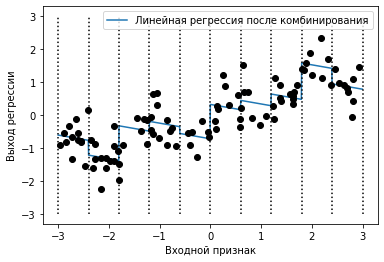

In [24]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Линейная регрессия после комбинирования')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc='best')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.plot(X[:, 0], y, 'o', c='k')

In [25]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


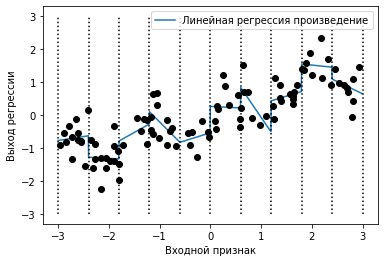

In [26]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Линейная регрессия произведение')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc='best')

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=10, include_bias=True)
poly.fit(X)
X_poly = poly.transform(X)

In [29]:
print("Форма массива: {}".format(X_poly.shape))

Форма массива: (100, 11)


In [30]:
print("Элементы массива X: {}\n".format(X[:5]))
print('Элементы массива X_poly: {}'.format(X_poly[:5]))

Элементы массива X: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Элементы массива X_poly: [[ 1.00000000e+00 -7.52759287e-01  5.66646544e-01 -4.26548448e-01
   3.21088306e-01 -2.41702204e-01  1.81943579e-01 -1.36959719e-01
   1.03097700e-01 -7.76077513e-02  5.84199555e-02]
 [ 1.00000000e+00  2.70428584e+00  7.31316190e+00  1.97768801e+01
   5.34823369e+01  1.44631526e+02  3.91124988e+02  1.05771377e+03
   2.86036036e+03  7.73523202e+03  2.09182784e+04]
 [ 1.00000000e+00  1.39196365e+00  1.93756281e+00  2.69701700e+00
   3.75414962e+00  5.22563982e+00  7.27390068e+00  1.01250053e+01
   1.40936394e+01  1.96178338e+01  2.73073115e+01]
 [ 1.00000000e+00  5.91950905e-01  3.50405874e-01  2.07423074e-01
   1.22784277e-01  7.26822637e-02  4.30243318e-02  2.54682921e-02
   1.50759786e-02  8.92423917e-03  5.28271146e-03]
 [ 1.00000000e+00 -2.06388816e+00  4.25963433e+00 -8.79140884e+00
   1.81444846e+01 -3.74481869e+01  7.72888694e+01 -1.59515582e+02
   3.29222321e

In [31]:
print("Имена полиноминальных признаков: \n{}".format(poly.get_feature_names()))

Имена полиноминальных признаков: 
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [32]:
reg = LinearRegression().fit(X_poly, y)

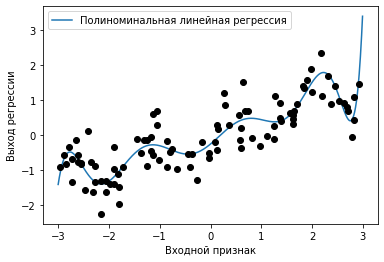

In [33]:
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Полиноминальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc='best')

In [34]:
from sklearn.svm import SVR

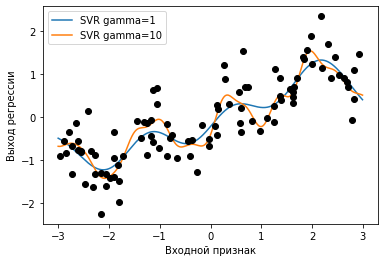

In [35]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc='best')

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [39]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaler)
print("Форма обучающего массива X: {}".format(X_train.shape))
print("Форма обучающего массива X_train_poly: {}".format(X_train_poly.shape))

Форма обучающего массива X: (379, 13)
Форма обучающего массива X_train_poly: (379, 105)


In [40]:
print("Имена полиноминальных признаков: \n{}".format(poly.get_feature_names()))

Имена полиноминальных признаков: 
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [41]:
from sklearn.linear_model import Ridge

In [42]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе без взаимодействия: {:.3f}".format(ridge.score(X_test_scaler, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Правильность на тестовом наборе с взаимодействием: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействия: 0.577
Правильность на тестовом наборе с взаимодействием: 0.741


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Правильность на тестовом наборе без взаимодействия: {:.3f}".format(rf.score(X_test_scaler, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Правильность на тестовом наборе без взаимодействия: {:.3f}".format(rf.score(X_test_poly, y_test)))

Правильность на тестовом наборе без взаимодействия: 0.801
Правильность на тестовом наборе без взаимодействия: 0.755


***

### Одномерные нелинейные преобразования

In [45]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [46]:
print("Частоты значений:\n{}".format(np.bincount(X[:, 0])))

Частоты значений:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, ' Значение')

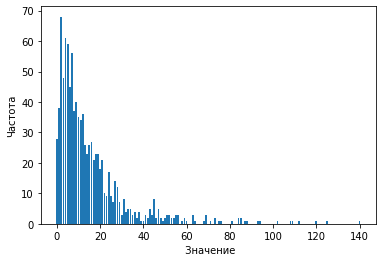

In [47]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins)
plt.ylabel("Частота")
plt.xlabel(" Значение")

In [48]:
from sklearn.linear_model import Ridge

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.622


In [50]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Значение')

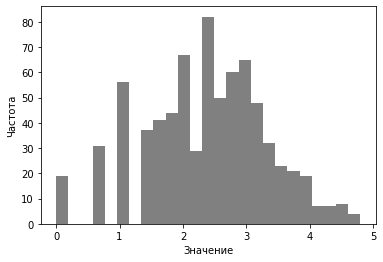

In [51]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Частота")
plt.xlabel("Значение")

In [52]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.875


***

### Одномерные статистики

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [54]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_select = select.transform(X_train)
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива X_train_select: {}".format(X_train_select.shape))

Форма массива X_train: (284, 80)
Форма массива X_train_select: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Индекс примера')

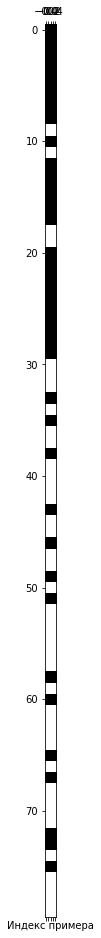

In [55]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(-1, 1), cmap='gray_r')
plt.xlabel("Индекс примера")

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_select, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.930
Правильность только с отобранными признаками: 0.940


C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Отбор признаков на основе модели

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [59]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [60]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("Форма обучающего набора X_train: {}".format(X_train.shape))
print("Форма обучающего набора X_train с L1: {}".format(X_train_l1.shape))

Форма обучающего набора X_train: (284, 80)
Форма обучающего набора X_train с L1: (284, 40)


Text(0.5, 0, 'Индекс примера')

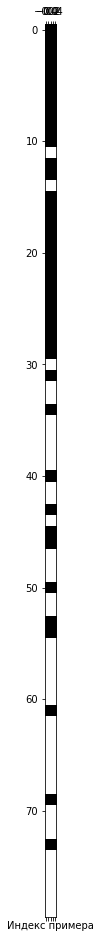

In [61]:
mask = select.get_support()
plt.matshow(mask.reshape(-1, 1), cmap='gray_r')
plt.xlabel("Индекс примера")

In [62]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.951


C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Итеративный отбор признаков

In [63]:
from sklearn.feature_selection import RFE

Text(0.5, 0, 'Индекс примера')

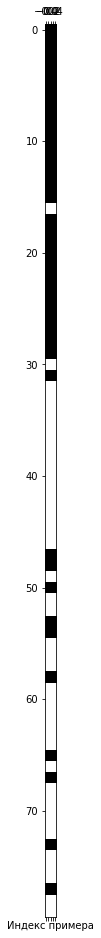

In [81]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(-1, 1), cmap='gray_r')
plt.xlabel("Индекс примера")

In [65]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.951


C:\Users\DruzykRB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


***
***

### Применение экспертных знаний

In [76]:
def load_citibike():
    data_mine = pd.read_csv("C:\datasets\citibike.csv")
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index('starttime')
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one
citibike = load_citibike()

In [78]:
print("Данные Citi Bike: {}".format(citibike.head()))

Данные Citi Bike: starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Частота проката')

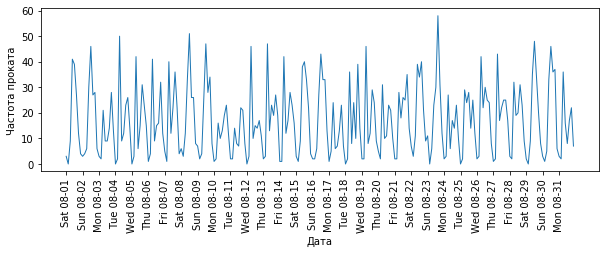

In [85]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90)
plt.plot(citibike, linewidth=1)
plt.xlabel("Дата")
plt.ylabel("Частота проката")

In [92]:
y = citibike.values
X = citibike.index.astype("int64").reshape(-1, 1) // 10**9

AttributeError: 'Int64Index' object has no attribute 'reshape'

In [88]:
X

Int64Index([1438387200000000000, 1438398000000000000, 1438408800000000000,
            1438419600000000000, 1438430400000000000, 1438441200000000000,
            1438452000000000000, 1438462800000000000, 1438473600000000000,
            1438484400000000000,
            ...
            1440957600000000000, 1440968400000000000, 1440979200000000000,
            1440990000000000000, 1441000800000000000, 1441011600000000000,
            1441022400000000000, 1441033200000000000, 1441044000000000000,
            1441054800000000000],
           dtype='int64', name='starttime', length=248)